In [121]:
import random
import numpy as np
from matplotlib import pyplot as plt

In [122]:
def PlotWithArrows(X,Y,arrowwidth,xmin,xmax,ymin,ymax,figname=None):
# Generate scatter plot of points (X,Y), with arrows representing the eigenvectors 
# of the covariance matrix, with lengths of the corresponding eigenvalues

    mu = np.array([np.mean(X),np.mean(Y)])
    Sigma = np.cov(X,Y)
    eigvals, eigvecs = np.linalg.eig(Sigma)
    
    # Adjust eigenvector arrows to have length of eigenvalue
    arrow1lenx,arrow1leny = eigvals[0]*eigvecs[0,0],eigvals[0]*eigvecs[1,0]
    arrow2lenx,arrow2leny = eigvals[1]*eigvecs[0,1],eigvals[1]*eigvecs[1,1]
    
    fig1 = plt.figure(figsize=(10,10))
    plt.scatter(X,Y)
    plt.arrow(mu[0],mu[1],arrow1lenx,arrow1leny,width=arrowwidth)
    plt.arrow(mu[0],mu[1],arrow2lenx,arrow2leny,width=arrowwidth)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    if figname:
        plt.savefig(figname)
    plt.show()


In [123]:
# Draw N 2-dimensional points from X1 and X2 given:
#     X1 ~ N(3,9)   and   X2 ~ N(4,4) 
# *here, N(u,s) is a normal distribution with mean u and variance s

N = 100
points = np.empty((100,2))
for i in range(N):
    x1 = random.gauss(3,3)
    x2 = 0.5*x1+random.gauss(4,2)
    points[i] = [x1,x2]
X1 = points[:,0]
X2 = points[:,1]

In [124]:
# (3a) Calculate the mean of the sample

mu = np.mean(points,axis=0)
print(mu)

[ 3.18273256  5.09248548]


In [125]:
# (3b) Compute the 2x2 covariance matrix

Sigma = np.cov(X1,X2)
print(Sigma)

[[ 8.4943665   4.52103804]
 [ 4.52103804  7.18995243]]


In [126]:
# (3c) Compute the eigenvectors and eigenvalues of this covariance matrix

eigvals, eigvecs = np.linalg.eig(Sigma)
print(eigvals)
print(eigvecs)

[ 12.4099991    3.27431983]
[[ 0.75590422 -0.65468222]
 [ 0.65468222  0.75590422]]


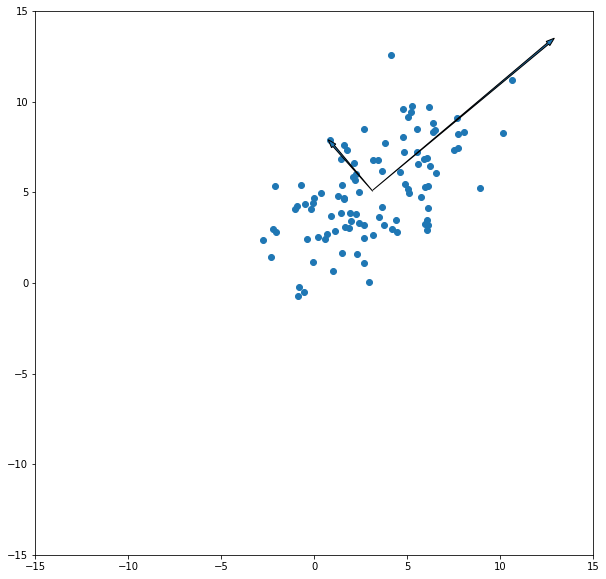

In [127]:
# (3d) Plot data points on grid, with arrows representing covariance eigenvectors

PlotWithArrows(X1,X2,0.1,-15,15,-15,15,"HW03_prob3d.jpg")

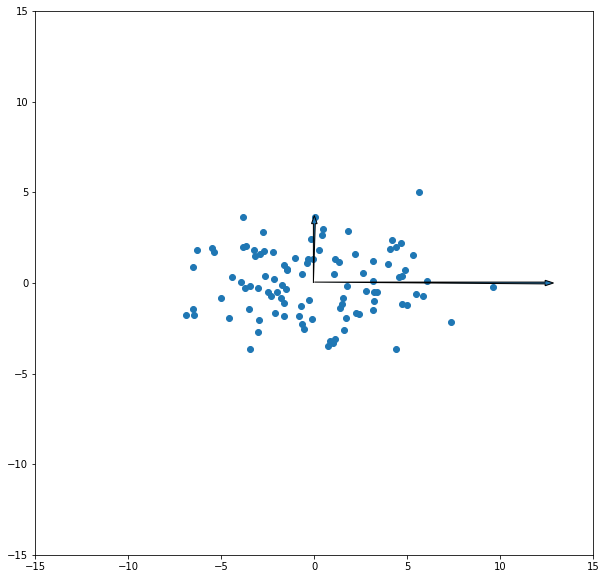

In [128]:
# (3e) Plot data points on grid, with arrows representing covariance eigenvectors

if eigvals[0] >= eigvals[1]:
    U = eigvecs
else:
    U = eigvecs[:,::-1]
centeredpoints = points - mu*np.ones_like(points)
rotatedpoints = np.empty_like(centeredpoints)
for i in range(len(rotatedpoints)):
    rotatedpoints[i] = np.dot(U.T,centeredpoints[i])
Y1 = rotatedpoints[:,0]
Y2 = rotatedpoints[:,1]

PlotWithArrows(Y1,Y2,0.1,-15,15,-15,15,"HW03_prob3e.jpg")